### Import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

### Import dataframe

In [7]:
df = pd.read_csv("df_clean.csv", index_col=0)

### Prepare dataframe for modelling

The main goal of this project is to predict, based on conditions, a benign and malign tumor. That is why "y" is the diagnosis type and "x" is all the condition variables.

In [12]:
### Change 'diagnosis' values to a binary type
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'B' else 0)

In [19]:
### Set X and Y data
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

In [16]:
y.head(2)

0    0
1    0
Name: diagnosis, dtype: int64

In [20]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


Due to the class imbalance analyzed in data exploration, it is necessary to consider a resampling technique.

In [21]:
### Apply RandomOverSampler to the dataset in order to increase the minority class
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [27]:
### Split data
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3)

### Model exploration

In [46]:
def explore_best_model(X_train, X_test, y_train, y_test, cv_folds):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "SVC": SVC()}


    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        cv_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy'))

        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

        print(f"Classification report for {name}: \n")
        print(classification_report(y_test, y_pred))

        print(f'Cross-validation for {name}: {cv_accuracy}' )


c:\Users\elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

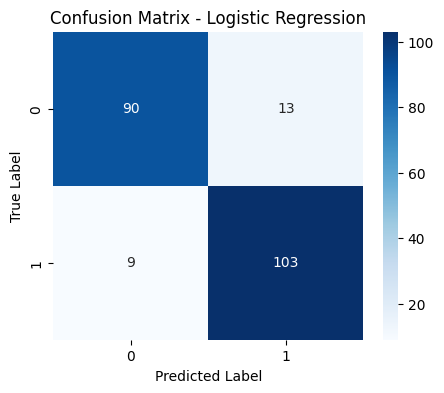

Classification report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       103
           1       0.89      0.92      0.90       112

    accuracy                           0.90       215
   macro avg       0.90      0.90      0.90       215
weighted avg       0.90      0.90      0.90       215

Cross-validation for Logistic Regression: 0.9077777777777779


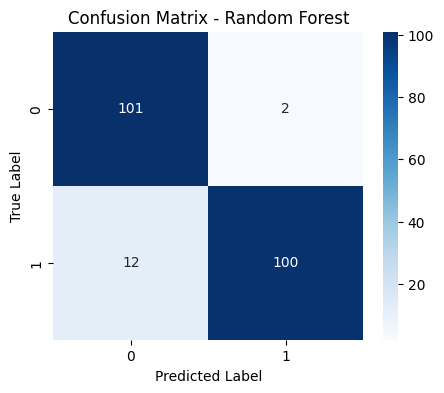

Classification report for Random Forest: 

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       103
           1       0.98      0.89      0.93       112

    accuracy                           0.93       215
   macro avg       0.94      0.94      0.93       215
weighted avg       0.94      0.93      0.93       215

Cross-validation for Random Forest: 0.94789898989899


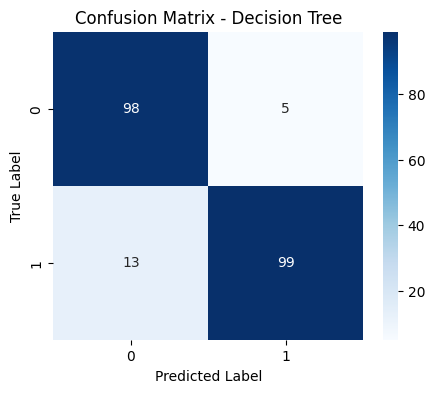

Classification report for Decision Tree: 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       103
           1       0.95      0.88      0.92       112

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215

Cross-validation for Decision Tree: 0.935878787878788


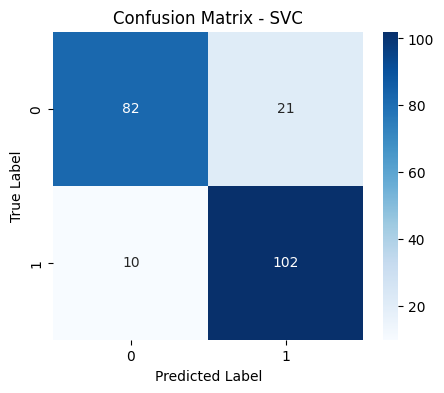

Classification report for SVC: 

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       103
           1       0.83      0.91      0.87       112

    accuracy                           0.86       215
   macro avg       0.86      0.85      0.85       215
weighted avg       0.86      0.86      0.86       215

Cross-validation for SVC: 0.8677171717171717


In [47]:
explore_best_model(X_train, X_test, y_train, y_test, cv_folds = 5)

The best model for this classification is Random Forest. It showed a better perfomance according to the classification report. In the confussion matrix, we can see a good distribution in the true postive and negative instances.